#IS 470 Lab 9: Association Rule Mining

---
Market basket analysis is used behind the scenes for the recommendation systems 
used in many brick-and-mortar and online retailers. The learned association rules indicate the combinations of items that are often purchased together. Knowledge of these patterns provides insight into new ways a grocery chain might optimize the inventory, advertise promotions,or organize the physical layout of the store. For instance, if shoppers frequently purchase coffee or orange juice with a breakfast pastry, it may be possible to increase profit by relocating pastries closer to coffee and juice.<br>
<br>
In this lab, we will perform a market basket analysis of transactional data 
from a grocery store.Our market basket analysis will utilize the purchase data 
collected from one month of operation at a real-world grocery store. The data contains 9,835 transactions.<br>
<br>

###1. Upload and clean data

In [ ]:
# Upload data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving groceries.csv to groceries.csv
User uploaded file "groceries.csv" with length 510697 bytes


In [ ]:
# Import libraries
! pip install apyori
import pandas as pd
import numpy as np
from csv import reader
import seaborn as sns
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=eb1ed29d9d22fa541563c19c632cb69d40faebdc81db3b4a704a6bbd7a17faee
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
# Read data line by line
groceries = []
with open('groceries.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    for row in csv_reader:
        groceries.append(row)

In [ ]:
# Inspect the first 5 transactions
groceries[0:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

## 2. Data exploration

In [ ]:
# Show the number of transactions
len(groceries)

9835

In [ ]:
# Show the number of unique items
flat_list = np.concatenate(groceries).flat
unique_item, item_count = np.unique(flat_list, return_counts=True)
print("number of unique items:", len(unique_item))

number of unique items: 169


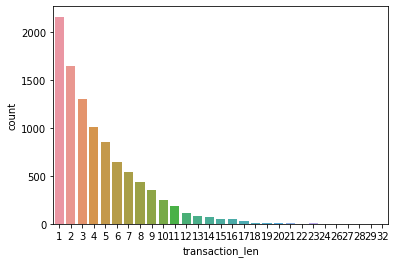

In [ ]:
# Plot the distribution of transaction length
transaction_len = []
for transaction in groceries:
  transaction_len.append(len(transaction))
sns.countplot(x = 'transaction_len', data = pd.DataFrame({'transaction_len':transaction_len}))

In [ ]:
# Examine the absolute frquency of items in descending order
item_frequency = pd.DataFrame({'items':flat_list})
item_frequency.value_counts()

items                
whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
baby food                   1
sound storage medium        1
Length: 169, dtype: int64

Q1. What are the top 3 most frequent items?<br>
<br>
1. whole milk
2. other vegetables
3. rolls/buns 



In [ ]:
# Examine the relative frquency of items in descending order
item_frequency.value_counts()/len(groceries)

items                
whole milk               0.255516
other vegetables         0.193493
rolls/buns               0.183935
soda                     0.174377
yogurt                   0.139502
                           ...   
bags                     0.000407
kitchen utensil          0.000407
preservation products    0.000203
baby food                0.000102
sound storage medium     0.000102
Length: 169, dtype: float64

Q2. What are the support values for top 3 most frequent items?<br>
<br>
whole milk               0.255516<br>
other vegetables         0.193493<br>
rolls/buns               0.183935<br>

## 3. Use the apriori algorithm to generate association rules

In [ ]:
# Use the apriori command to generate rules with minimal support = 0.01, minimal confidence = 0.3, and max length = 2.
groceries_rules = apriori(groceries, min_support = 0.01, min_confidence = 0.3, max_length=2)
groceries_rules = list(groceries_rules)

In [ ]:
# Display all rules
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(groceries_rules)):
  for rule_ in groceries_rules[i].ordered_statistics:
    all_rules = all_rules.append({'LHS':','.join(list(rule_.items_base)),'RHS':','.join(list(rule_.items_add)), 'support': groceries_rules[i].support, 'confidence': rule_.confidence, 'lift': rule_.lift}, ignore_index=True)
pd.options.display.max_rows = 999
all_rules

,LHS,RHS,support,confidence,lift
0,beef,other vegetables,0.019725,0.375969,1.943066
1,beef,root vegetables,0.017387,0.331395,3.040367
2,beef,whole milk,0.021251,0.405039,1.585180
3,berries,other vegetables,0.010269,0.308869,1.596280
4,berries,whole milk,0.011795,0.354740,1.388328
5,berries,yogurt,0.010574,0.318043,2.279848
6,bottled water,whole milk,0.034367,0.310948,1.216940
7,brown bread,whole milk,0.025216,0.388715,1.521293
8,butter,other vegetables,0.020031,0.361468,1.868122
9,butter,whole milk,0.027555,0.497248,1.946053


Q3. How many rules are generated?<br>
<br>
69 rules were created<br>


In [ ]:
# Display all rules sorted by confidence levels
all_rules.sort_values(by='confidence', ascending=False)

,LHS,RHS,support,confidence,lift
9,butter,whole milk,0.027555,0.497248,1.946053
22,curd,whole milk,0.026131,0.490458,1.919481
27,domestic eggs,whole milk,0.029995,0.472756,1.850203
44,onions,other vegetables,0.014235,0.459016,2.372268
66,whipped/sour cream,whole milk,0.032232,0.449645,1.759754
60,root vegetables,whole milk,0.048907,0.448694,1.756031
63,sugar,whole milk,0.015048,0.444444,1.739400
35,hamburger meat,whole milk,0.014743,0.443425,1.735410
33,ham,whole milk,0.011490,0.441406,1.727509
62,sliced cheese,whole milk,0.010778,0.439834,1.721356


In [ ]:
# Display the top 5 rules sorted by confidence levels
all_rules.sort_values(by='confidence', ascending=False)[0:5]

,LHS,RHS,support,confidence,lift
9,butter,whole milk,0.027555,0.497248,1.946053
22,curd,whole milk,0.026131,0.490458,1.919481
27,domestic eggs,whole milk,0.029995,0.472756,1.850203
44,onions,other vegetables,0.014235,0.459016,2.372268
66,whipped/sour cream,whole milk,0.032232,0.449645,1.759754


Q4. What is the probability of buying whole milk when butter is purchased?<br>
<br>
The probability of buying whole milk when butter is purchased is 0.497248 (49.72%).

Q5. What is the probability of buying butter and whole milk together?<br>
<br>
The probability of buying butter and whole milk together is 0.027555 (2.755%).

Q6. Interpret the first rule based on the values of the support, confidence, and lift.<br>
<br>
The support value of the first rule shows that the chances of a customer purchasing butter and whole milk together in any transaction are 0.027555. The confidence value is saying that if the customer was to buy a stick of butter, the probability that they also purchase whole milk is 0.497248. Now, if the customer has already purchased butter the probability of purchasing whole milk will be increased by the lift value 1.946053 times. Also, if the customer purchased whole milk the probability of purchasing butter will be increased by the lift value 1.946053 times. The lift and support values have no directions, they can be interpreted either way. However, confidence must consider direction, from left to right. Therefore, using these values of the first rule we can see that butter and whole milk are an interesting rule and as a business owner you can use this information to strategically place the products and market the products in the store to consumers.


In [ ]:
# Use the apriori command to generate rules with minimal support = 0.02 and minimal confidence = 0.4 and max length = 3.
groceries_rules2 = apriori(groceries, min_support = 0.02, min_confidence = 0.4, max_length=3)
groceries_rules2 = list(groceries_rules2)

In [ ]:
# Display all rules
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(groceries_rules2)):
  for rule_ in groceries_rules2[i].ordered_statistics:
    all_rules = all_rules.append({'LHS':','.join(list(rule_.items_base)),'RHS':','.join(list(rule_.items_add)), 'support': groceries_rules2[i].support, 'confidence': rule_.confidence, 'lift': rule_.lift}, ignore_index=True)
pd.options.display.max_rows = 999
all_rules

,LHS,RHS,support,confidence,lift
0,beef,whole milk,0.021251,0.405039,1.585180
1,butter,whole milk,0.027555,0.497248,1.946053
2,curd,whole milk,0.026131,0.490458,1.919481
3,domestic eggs,whole milk,0.029995,0.472756,1.850203
4,frozen vegetables,whole milk,0.020437,0.424947,1.663094
5,margarine,whole milk,0.024199,0.413194,1.617098
6,root vegetables,other vegetables,0.047382,0.434701,2.246605
7,whipped/sour cream,other vegetables,0.028876,0.402837,2.081924
8,root vegetables,whole milk,0.048907,0.448694,1.756031
9,tropical fruit,whole milk,0.042298,0.403101,1.577595


In [ ]:
# Display top 10 rules sorted by lift
all_rules.sort_values(by='lift', ascending=False)[0:10]

,LHS,RHS,support,confidence,lift
33,"whole milk,other vegetables",root vegetables,0.023183,0.309783,2.842082
34,"whole milk,root vegetables",other vegetables,0.023183,0.474012,2.449770
17,root vegetables,other vegetables,0.047382,0.434701,2.246605
19,whipped/sour cream,other vegetables,0.028876,0.402837,2.081924
36,"whole milk,yogurt",other vegetables,0.022267,0.397459,2.054131
35,"yogurt,other vegetables",whole milk,0.022267,0.512881,2.007235
4,butter,whole milk,0.027555,0.497248,1.946053
16,pork,other vegetables,0.021657,0.375661,1.941476
7,curd,whole milk,0.026131,0.490458,1.919481
32,"root vegetables,other vegetables",whole milk,0.023183,0.489270,1.914833


In [ ]:
# Find and display rules containing "other vegetables" on the left-hand side
all_rules[all_rules['LHS'].str.contains('other vegetables')]

,LHS,RHS,support,confidence,lift
12,"root vegetables,other vegetables",whole milk,0.023183,0.489270,1.914833
14,"yogurt,other vegetables",whole milk,0.022267,0.512881,2.007235


Q7. Interpret the first rule based on the values of the support, confidence, and lift.<br>

The support value of the first rule shows that the chances of a customer purchasing root vegetables,other vegetables, and whole milk together in any transaction are 0.023183. The confidence value is saying that if the customer was to buy root vegetables and other vegetables, the probability that they also purchase whole milk is 0.489270. Now, if the customer has already purchased root vegetables and other vegetables the probability of purchasing whole milk will be increased by the lift value 1.914833 times. Also, if the customer purchased whole milk the probability of purchasing root vegetables and other vegetables will be increased by the lift value 1.914833 times. The lift and support values have no directions, they can be interpreted either way. However, confidence must consider direction, from left to right. Therefore, using these values of the first rule we can see that root vegetables and other vegetables, and whole milk are an interesting rule and as a business owner you can use this information to strategically market the products in the store to consumers.

In [ ]:
# Find and display rules containing "other vegetables" on the right-hand side
all_rules[all_rules['RHS'].str.contains('other vegetables')]

,LHS,RHS,support,confidence,lift
6,root vegetables,other vegetables,0.047382,0.434701,2.246605
7,whipped/sour cream,other vegetables,0.028876,0.402837,2.081924
13,"whole milk,root vegetables",other vegetables,0.023183,0.474012,2.449770


In [ ]:
# Use the apriori command to generate about 30 to 50 association rules. Set your own minimum support and confidence threshold levels. 
# Remember if the thresholds are too low, you will get too many rules, or if you set them too high, you may not get any or enough rules.
groceries_rules3 = apriori(groceries, min_support = 0.02, min_confidence = 0.3, max_length=3)
groceries_rules3 = list(groceries_rules3)

In [ ]:
# Display all rules
all_rules = pd.DataFrame(columns=('LHS','RHS','support','confidence','lift'))
for i in range(len(groceries_rules3)):
  for rule_ in groceries_rules3[i].ordered_statistics:
    all_rules = all_rules.append({'LHS':','.join(list(rule_.items_base)),'RHS':','.join(list(rule_.items_add)), 'support': groceries_rules3[i].support, 'confidence': rule_.confidence, 'lift': rule_.lift}, ignore_index=True)
pd.options.display.max_rows = 999
all_rules

,LHS,RHS,support,confidence,lift
0,beef,whole milk,0.021251,0.405039,1.585180
1,bottled water,whole milk,0.034367,0.310948,1.216940
2,brown bread,whole milk,0.025216,0.388715,1.521293
3,butter,other vegetables,0.020031,0.361468,1.868122
4,butter,whole milk,0.027555,0.497248,1.946053
5,citrus fruit,other vegetables,0.028876,0.348894,1.803140
6,citrus fruit,whole milk,0.030503,0.368550,1.442377
7,curd,whole milk,0.026131,0.490458,1.919481
8,domestic eggs,other vegetables,0.022267,0.350962,1.813824
9,domestic eggs,whole milk,0.029995,0.472756,1.850203


In [ ]:
# Display all rules sorted by lift
all_rules.sort_values(by='lift', ascending=False)

,LHS,RHS,support,confidence,lift
33,"whole milk,other vegetables",root vegetables,0.023183,0.309783,2.842082
34,"whole milk,root vegetables",other vegetables,0.023183,0.474012,2.449770
17,root vegetables,other vegetables,0.047382,0.434701,2.246605
19,whipped/sour cream,other vegetables,0.028876,0.402837,2.081924
36,"whole milk,yogurt",other vegetables,0.022267,0.397459,2.054131
35,"yogurt,other vegetables",whole milk,0.022267,0.512881,2.007235
4,butter,whole milk,0.027555,0.497248,1.946053
16,pork,other vegetables,0.021657,0.375661,1.941476
7,curd,whole milk,0.026131,0.490458,1.919481
32,"root vegetables,other vegetables",whole milk,0.023183,0.489270,1.914833


Q8. Select an interesting rule and explain how it can benefit the grocery store.<br>
<br>
An interesting rule is the association between sausages and rolls/buns. The support value of the two bought together is 0.030605. Showing that it is a rather commonly bought transaction. In addition, if a customer purchases sausages the probability of them purchasing rolls/buns is 0.325758. Therefore, the confidence level is quite high. They can maximize sales of rolls/buns if they place them near the sausages. Or they can place the rolls/buns a little further apart so customers have to go through a different set of products that maybe they will buy on their way to find the rolls/buns section since they are highly likely to purchase rolls/buns if they are already planning on buying sausages.


***Download the html file and submit to BeachBoard***<br>
<br>
1.   ***Download the lab9.ipynb file***
2.   ***Upload the lab9.ipynb file***
3.   ***Run the code below to generate a html file***
4.   ***Download the html file and submit to BeachBoard***

In [ ]:
!jupyter nbconvert --to html IS470_lab9.ipynb

[NbConvertApp] Converting notebook IS470_lab9.ipynb to html
[NbConvertApp] Writing 368403 bytes to IS470_lab9.html
